In [1]:
from ast import literal_eval
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import patches
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sys

# import utils
sys.path.append("../")

from data_loading import *
from plotting import y1h_pdi_per_tf_gene_plot, m1h_activation_per_tf_gene_plot, COLOR_PURPLE
from data_loading import (load_annotated_TFiso1_collection, 
                          load_y1h_pdi_data, 
                          load_developmental_tissue_expression_remapped,
                          load_gtex_remapped)

In [2]:
PAPER_PRESET = {"style": "ticks", "font": "Helvetica", "context": "paper", 
                "rc": {"font.size":7,"axes.titlesize":7,
                       "axes.labelsize":7, 'axes.linewidth':0.5,
                       "legend.fontsize":6, "xtick.labelsize":6,
                       "ytick.labelsize":6, "xtick.major.size": 3.0,
                       "ytick.major.size": 3.0, "axes.edgecolor": "black",
                       "xtick.major.pad": 3.0, "ytick.major.pad": 3.0}}
PAPER_FONTSIZE = 7

In [3]:
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

In [4]:
np.random.seed(2023)

In [5]:
tfs = load_annotated_TFiso1_collection()

/data/bulyk/kaia/projects/repos/tf_isoforms/cache/load_annotated_TFiso1_collection.pkl
reading from cache


In [6]:
y1h_baits_f = "../../data/internal/Y1H_DNA_baits.fa"

## 1. import baits and y1h results

In [7]:
ids = []
seqs = []

for record in SeqIO.parse(y1h_baits_f, "fasta"):
    ids.append(record.description)
    seqs.append(str(record.seq))
    
dna = pd.DataFrame()
dna["id"] = ids
dna["seq"] = seqs
dna["seq_len"] = dna.seq.str.len()
dna["id_upper"] = dna["id"].str.upper()
dna

,id,seq,seq_len,id_upper
0,hs1006,TAGTGGTGAACAACCACCATTGCTGCATCACGGAGTTTAAGTTCTC...,1493,HS1006
1,hs101,CCTCATACCTCCAAAGCCTCCAAGGCATTCCATGGAGCCATAATTG...,1329,HS101
2,hs1022,CAAAGCTGGCTAAAACCATGTCTGGAAAGCTGACAAATTTCCAGGT...,1378,HS1022
3,hs1030,GCAGAATTGCAACAAGAATTTCTTCTGTATTATTTTTTCATAGATA...,1436,HS1030
4,hs1043,GAAGACCAGAAAACCAGAAAGGCGAGGAGCGGCGGACGCTGACCCT...,1191,HS1043
...,...,...,...,...
454,MUT_91,GGAACATAGTTGGATGAGGAATTAATTAGATGGAAGGGAGATTTTG...,61,MUT_91
455,MUT_92,ACCCTCTGTAAACACTCAATGTGTTCTCACCTTGTTATCATTCCCA...,61,MUT_92
456,MUT_93,CTACTGAGCCATGAAAAAGAACAAGCCAAATGGATGGTCCAAAATG...,61,MUT_93
457,MUT_98,CCTTGAGGATGAAAGACAGGTACAGAGGCATGAATGCTTGTACCTG...,61,MUT_98


In [8]:
#y1h = load_y1h_pdi_data(add_missing_data=True) # erroring out
y1h = load_y1h_pdi_data()
y1h

,gene_symbol,clone_acc,HS1006,HS1022,HS1043,HS1067,HS1139,HS1142,HS118,HS1181,...,KITLG,LTA,PF4V1,TNFSF10,TNFSF13,TNFSF14,TNFSF4,TNFSF8,XCL1,XCL2
0,CREB1,CREB1|1/2|02E01,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,CREB1,CREB1|2/2|01F12,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,DLX1,DLX1|1/2|07A12,False,False,False,<NA>,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,DLX1,DLX1|2/2|07E09,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,DLX4,DLX4|1/3|11A04,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,ZNF18,ZNF18|3/3|07D01,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
169,ZNF320,ZNF320|1/2|12A05,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
170,ZNF438,ZNF438|1/2|09H05,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
171,ZNF438,ZNF438|2/2|09E04,False,False,False,False,False,False,False,False,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## CREB1

In [9]:
kfit_dat = pd.read_table("../../data/processed/pbms/CREB1kfit_dat.csv", sep=",")
da_dat = pd.read_table("../../data/processed/pbms/CREB1da_dat.csv", sep=",")

In [10]:
kfit_ref = kfit_dat[kfit_dat["cname"] == "CREB1-ref"]
kfit_alt = kfit_dat[kfit_dat["cname"] == "CREB1-alt"]

In [11]:
kfit_vs = kfit_ref.merge(kfit_alt, on=["seq"], suffixes=("_ref", "_alt"))

In [12]:
da_alt = da_dat[da_dat["cname"] == "CREB1-alt"]

In [13]:
kfit_vs = kfit_vs.merge(da_alt[["seq", "contrastQ", "contrastQ_cut", "contrastAverage", "contrastDifference"]], on="seq")

In [14]:
kfit_vs.contains_any_motif_ref.value_counts()

*other k-mer    32640
CREB1 k-mer       256
Name: contains_any_motif_ref, dtype: int64

In [15]:
kfit_vs.affinityEstimate_ref.max()

11.507647689855302

In [16]:
creb1_y1h = (y1h.loc[y1h["gene_symbol"] == "CREB1", y1h.columns[1:]].copy().set_index("clone_acc"))
creb1_y1h = creb1_y1h.loc[:, creb1_y1h.any(axis=0)]
creb1_y1h

,HS697,MUT_156,MUT_158,MUT_162
clone_acc,,,,
CREB1|1/2|02E01,False,False,False,False
CREB1|2/2|01F12,True,True,True,True


In [17]:
creb1_baits = list(creb1_y1h.columns)
creb1_baits = dna[dna["id_upper"].isin(creb1_baits)]
creb1_baits

,id,seq,seq_len,id_upper
195,hs697,CATTAGGAGAGGACTCTGTCTATATTTTTAATTTTAGCTTAAAACC...,1142,HS697
286,MUT_156,GCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGAGC...,61,MUT_156
288,MUT_158,GGGCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGA...,61,MUT_158
293,MUT_162,ATTTTTTACATATGCCTCCTCGTTTTGTGAATTTTGAAAGGATGTG...,61,MUT_162


In [18]:
kfit_vs.columns

Index(['seq', 'cname_ref', 'affinityEstimate_ref', 'affinityVariance_ref',
       'contrastDifference_ref', 'contrastAverage_ref', 'contrastVariance_ref',
       'contains_motif_ref', 'contains_rc_motif_ref', 'contains_any_motif_ref',
       'cname_alt', 'affinityEstimate_alt', 'affinityVariance_alt',
       'contrastDifference_alt', 'contrastAverage_alt', 'contrastVariance_alt',
       'contains_motif_alt', 'contains_rc_motif_alt', 'contains_any_motif_alt',
       'contrastQ', 'contrastQ_cut', 'contrastAverage', 'contrastDifference'],
      dtype='object')

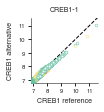

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(1.2, 1.2))

markers = [",", "."]
titles = ["CREB1-1"]

for k, motif in enumerate(["*other k-mer", "CREB1 k-mer"]):
    for j, qval in enumerate(["(0.1,1]", "(0.01,0.1]", "(0.001,0.01]", "[0,0.001]"]):

        sub = kfit_vs[(kfit_vs["contrastQ_cut"] == qval) & 
                      (kfit_vs["contains_any_motif_ref"] == motif)]
        xs = sub["affinityEstimate_ref"]
        ys = sub["affinityEstimate_alt"]
        ts = sub["contrastQ"]
        
        color = sns.color_palette("Spectral_r", n_colors=4)[j]
        marker = markers[k]

        if marker == "o":
            ax.scatter(xs, ys, 30, marker=".", edgecolors="black", facecolors=color, alpha=1, linewidth=0.5,
                       zorder=10)
        elif marker == ",":
            ax.scatter(xs, ys, 30, marker=".", edgecolors=color, facecolors=color, alpha=0.5,
                       zorder=10)
        else:
            ax.scatter(xs, ys, 30, marker=marker, edgecolors=color, facecolors='white', alpha=1, linewidth=0.5,
                       zorder=10)

ax.set_xlim((6.8, 11.6))
ax.set_xticks([7, 8, 9, 10, 11])
ax.set_ylim((6.8, 11.6))
ax.set_yticks([7, 8, 9, 10, 11])
ax.plot([6.8, 11.6], [6.8, 11.6], color="black", linestyle="dashed", linewidth=1, zorder=1)
# ax.set_xticks([6, 8, 10, 12])
# ax.set_yticks([6, 8, 10, 12])
ax.set_xlabel("CREB1 reference")
ax.set_ylabel("CREB1 alternative")
ax.set_title("CREB1-1")

for loc in ['top', 'right']:
    ax.spines[loc].set_visible(False)
    
fig.savefig("../../figures/fig3/CREB1_isoforms_pbm_scatter.pdf", dpi="figure", bbox_inches="tight")

In [20]:
# add colors to kfit_vs
cmap_name = "Spectral"
colname = "contrastDifference_alt"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[colname].min(), vmax=kfit_vs[colname].max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

def get_rgb(row, colname, m):
    x = row[colname]
    rgb = m.to_rgba(x)
    return rgb

kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)
kfit_vs.sample(5)

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_motif_ref,contains_rc_motif_ref,contains_any_motif_ref,...,contrastAverage_alt,contrastVariance_alt,contains_motif_alt,contains_rc_motif_alt,contains_any_motif_alt,contrastQ,contrastQ_cut,contrastAverage,contrastDifference,contrastDifference_alt_rgb
18912,CCGCCAAG,CREB1-ref,7.167449,0.006705,NaN,NaN,NaN,False,False,*other k-mer,...,7.173541,0.001229,False,False,*other k-mer,0.985573,"(0.1,1]",7.173541,0.012184,"(0.6440599769319495, 0.8562860438292965, 0.643..."
1387,AACCCTCG,CREB1-ref,7.331271,0.003825,NaN,NaN,NaN,False,False,*other k-mer,...,7.319696,0.001151,False,False,*other k-mer,0.965806,"(0.1,1]",7.319696,-0.023150,"(0.7386389850057672, 0.8943483275663208, 0.629..."
30892,TAACATAA,CREB1-ref,7.730715,0.001758,NaN,NaN,NaN,False,False,*other k-mer,...,7.734969,0.001407,False,False,*other k-mer,0.990528,"(0.1,1]",7.734969,0.008508,"(0.6546712802768171, 0.8604382929642448, 0.643..."
25539,GACTATAA,CREB1-ref,7.709255,0.003579,NaN,NaN,NaN,False,False,*other k-mer,...,7.687784,0.001402,False,False,*other k-mer,0.897803,"(0.1,1]",7.687784,-0.042944,"(0.7930795847750868, 0.916493656286044, 0.6182..."
3322,AATCCAGT,CREB1-ref,7.440856,0.003717,NaN,NaN,NaN,False,False,*other k-mer,...,7.428962,0.001246,False,False,*other k-mer,0.966868,"(0.1,1]",7.428962,-0.023787,"(0.7477124183006538, 0.8980392156862746, 0.627..."


In [21]:
def vals_per_bait(row, kfit_vs, colname, alt_suffix, ascending):
    
    kmers = []
    seq = row.seq
    seq_len = row.seq_len
    for i in range(0, seq_len-8):
        kmer = seq[i:i+8]
        kmers.append(kmer)
        
    sub = kfit_vs[kfit_vs["seq"].isin(kmers)]
    sub["abs"] = np.abs(sub[colname])
    sub = sub.sort_values(by="abs", ascending=ascending)
    largest_kmer = sub["seq"].iloc[0]
    largest_val = sub[colname].iloc[0]
    xval = sub["affinityEstimate_ref"].iloc[0]
    yval = sub["affinityEstimate_%s" % alt_suffix].iloc[0]
    
    rgb = sub["%s_rgb" % colname].iloc[0]
    return "%s_%s_%s_%s_%s" % (largest_kmer, largest_val, xval, yval, rgb)

In [22]:
creb1_baits["tmp"] = creb1_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_alt", alt_suffix="alt",
                                       ascending=False)
creb1_baits["val_kmer"] = creb1_baits["tmp"].str.split("_", expand=True)[0].astype(str)
creb1_baits["val_diff"] = creb1_baits["tmp"].str.split("_", expand=True)[1].astype(float)
creb1_baits["xval"] = creb1_baits["tmp"].str.split("_", expand=True)[2].astype(float)
creb1_baits["yval"] = creb1_baits["tmp"].str.split("_", expand=True)[3].astype(float)
creb1_baits["rgb"] = creb1_baits["tmp"].str.split("_", expand=True)[4].astype(str)
creb1_baits["rgb"] = creb1_baits["rgb"].apply(literal_eval)
creb1_baits

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

,id,seq,seq_len,id_upper,tmp,val_kmer,val_diff,xval,yval,rgb
195,hs697,CATTAGGAGAGGACTCTGTCTATATTTTTAATTTTAGCTTAAAACC...,1142,HS697,AATAATTA_-0.256643395741017_8.01488613473334_7...,AATAATTA,-0.256643,8.014886,7.758243,"(0.9962322183775472, 0.88319876970396, 0.55309..."
286,MUT_156,GCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGAGC...,61,MUT_156,TGACGTCA_-0.476488499421089_11.507647689855302...,TGACGTCA,-0.476488,11.507648,11.031159,"(0.8996539792387543, 0.340715109573241, 0.2848..."
288,MUT_158,GGGCTCCGTCTCCACAGCCCTGGCCCAGCAGCCTCTTATAAGCTGA...,61,MUT_158,TGACGTCA_-0.476488499421089_11.507647689855302...,TGACGTCA,-0.476488,11.507648,11.031159,"(0.8996539792387543, 0.340715109573241, 0.2848..."
293,MUT_162,ATTTTTTACATATGCCTCCTCGTTTTGTGAATTTTGAAAGGATGTG...,61,MUT_162,ATTTTGAA_0.0917191558815862_7.4191645160819695...,ATTTTGAA,0.091719,7.419165,7.510884,"(0.4, 0.7607843137254902, 0.6470588235294118, ..."


In [23]:
colors = creb1_baits[["id_upper", "rgb"]].set_index("id_upper").T
colors.index = ["CREB1-1"]
colors.loc["CREB1-2"] = [(0, 0, 0, 1)] * len(creb1_baits)
colors = colors.loc[["CREB1-2", "CREB1-1"]]
colors

id_upper,HS697,MUT_156,MUT_158,MUT_162
CREB1-2,"(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)"
CREB1-1,"(0.9962322183775472, 0.88319876970396, 0.55309...","(0.8996539792387543, 0.340715109573241, 0.2848...","(0.8996539792387543, 0.340715109573241, 0.2848...","(0.4, 0.7607843137254902, 0.6470588235294118, ..."


In [24]:
annot = creb1_baits[["id_upper", "val_diff"]].set_index("id_upper").T
annot.index = ["CREB1-1"]
annot.loc["CREB1-2"] = ["NA"] * len(creb1_baits)
annot = annot.loc[["CREB1-2", "CREB1-1"]]
annot

id_upper,HS697,MUT_156,MUT_158,MUT_162
CREB1-2,NA,NA,NA,NA
CREB1-1,-0.256643,-0.476488,-0.476488,0.0917192


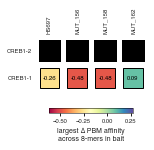

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
y1h_pdi_per_tf_gene_plot("CREB1", data=y1h, ax=ax, 
                         iso_order=["CREB1-2", "CREB1-1"], bait_colors=colors, bait_annot=annot)

plt.colorbar(m, ax=ax, orientation="horizontal", shrink=0.75, label="largest ∆ PBM affinity\nacross 8-mers in bait")
plt.savefig('../../figures/fig3/CREB1_y1h_with_pbm.pdf', bbox_inches='tight', dpi="figure")

## TBX5

In [26]:
kfit_dat = pd.read_table("../../data/processed/pbms/TBX5kfit_dat.csv", sep=",")
da_dat = pd.read_table("../../data/processed/pbms/TBX5da_dat.csv", sep=",")

In [27]:
kfit_ref = kfit_dat[kfit_dat["cname"] == "TBX5C05-REF"]
kfit_3 = kfit_dat[kfit_dat["cname"] == "TBX5A05"]
kfit_2 = kfit_dat[kfit_dat["cname"] == "TBX5B05"]

In [28]:
kfit_vs = kfit_ref.merge(kfit_2, on=["seq"], suffixes=("_ref", ""))
kfit_vs = kfit_vs.merge(kfit_3, on=["seq"], suffixes=("_iso2", "_iso3"))
kfit_vs.head()

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,contrastAverage_iso2,contrastVariance_iso2,contains_any_motif_iso2,cname_iso3,affinityEstimate_iso3,affinityVariance_iso3,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3
0,AAAAAAAA,TBX5C05-REF,10.028611,0.004803,NaN,NaN,NaN,other k-mer,TBX5B05,9.903240,...,9.965926,0.003227,other k-mer,TBX5A05,9.931881,0.003412,-0.096730,9.980246,0.003536,other k-mer
1,AAAAAAAC,TBX5C05-REF,9.956585,0.001912,NaN,NaN,NaN,other k-mer,TBX5B05,9.934673,...,9.945629,0.005728,other k-mer,TBX5A05,9.957827,0.003953,0.001242,9.957206,0.003823,other k-mer
2,AAAAAAAG,TBX5C05-REF,10.115281,0.008088,NaN,NaN,NaN,other k-mer,TBX5B05,10.040526,...,10.077904,0.004583,other k-mer,TBX5A05,9.936246,0.004633,-0.179034,10.025764,0.005549,other k-mer
3,AAAAAAAT,TBX5C05-REF,10.020661,0.004480,NaN,NaN,NaN,other k-mer,TBX5B05,9.994817,...,10.007739,0.003959,other k-mer,TBX5A05,9.973363,0.002724,-0.047297,9.997012,0.004635,other k-mer
4,AAAAAACA,TBX5C05-REF,10.005205,0.005584,NaN,NaN,NaN,other k-mer,TBX5B05,9.981221,...,9.993213,0.004405,other k-mer,TBX5A05,9.912703,0.003827,-0.092501,9.958954,0.004838,other k-mer


In [29]:
da_3 = da_dat[da_dat["cname"] == "TBX5A05"]
da_2 = da_dat[da_dat["cname"] == "TBX5B05"]

In [30]:
kfit_vs = kfit_vs.merge(da_2[["seq", "contrastQ", "contrastQ_cut"]], on="seq")
kfit_vs = kfit_vs.merge(da_3[["seq", "contrastQ", "contrastQ_cut"]], on="seq", suffixes=("_iso2", "_iso3"))

In [31]:
kfit_vs.contains_any_motif_ref.value_counts()

other k-mer     32848
* TBX5 k-mer       48
Name: contains_any_motif_ref, dtype: int64

In [32]:
def add_motif_category(row, motif_name, motif, motif_rc):
    if motif in row.seq or motif_rc in row.seq:
        return motif_name
    else:
        return row.contains_any_motif_ref

kfit_vs["contains_any_motif_ref"] = kfit_vs.apply(add_motif_category, motif_name="* ACGTGT k-mer",
                                                  motif="ACGTGT", motif_rc="ACACGT", axis=1)
kfit_vs.contains_any_motif_ref.value_counts()

other k-mer       32800
* TBX5 k-mer         48
* ACGTGT k-mer       48
Name: contains_any_motif_ref, dtype: int64

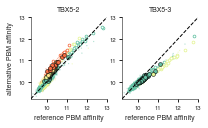

In [33]:
fig, axarr = plt.subplots(1, 2, figsize=(3, 1.5))

markers = [",", ".", "o"]
titles = ["TBX5-2", "TBX5-3"]

for i, suffix in enumerate(["iso2", "iso3"]):
    
    ax = axarr[i]

    for k, motif in enumerate(["other k-mer", "* TBX5 k-mer", "* ACGTGT k-mer"]):
        for j, qval in enumerate(["(0.1,1]", "(0.01,0.1]", "(0.001,0.01]", "[0,0.001]"]):
            
            sub = kfit_vs[(kfit_vs["contrastQ_cut_%s" % suffix] == qval) & 
                          (kfit_vs["contains_any_motif_ref"] == motif)]
            xs = sub["affinityEstimate_ref"]
            ys = sub["affinityEstimate_%s" % suffix]
            
            color = sns.color_palette("Spectral_r", n_colors=4)[j]
            marker = markers[k]
            
            if marker == "o":
                ax.scatter(xs, ys, 15, marker=marker, edgecolors="black", facecolors=color, alpha=1, linewidth=0.5)
            elif marker == ",":
                ax.scatter(xs, ys, 1, marker=".", edgecolors=color, facecolors='none', alpha=0.5)
            else:
                ax.scatter(xs, ys, 30, marker=marker, edgecolors=color, facecolors='white', alpha=1)
                
    
    ax.set_xlim((9.2, 13))
    ax.set_ylim((9.2, 13))
    ax.plot([9.2, 13], [9.2, 13], color="black", linestyle="dashed", linewidth=1, zorder=1)
    ax.set_xticks([10, 11, 12, 13])
    ax.set_yticks([10, 11, 12, 13])
    ax.set_xlabel("reference PBM affinity")
    ax.set_title(titles[i])
    
axarr[0].set_ylabel("alternative PBM affinity")

for loc in ['top', 'right']:
    axarr[0].spines[loc].set_visible(False)
    axarr[1].spines[loc].set_visible(False)
    
fig.savefig("../../figures/fig3/TBX5_isoforms_pbm_scatter.pdf", dpi="figure", bbox_inches="tight")

In [34]:
# add colors to kfit_vs
cmap_name = "Spectral"
colname = "contrastDifference_iso2"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[colname].min(), vmax=kfit_vs[colname].max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)
kfit_vs.sample(5)

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,affinityVariance_iso3,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3,contrastQ_iso2,contrastQ_cut_iso2,contrastQ_iso3,contrastQ_cut_iso3,contrastDifference_iso2_rgb
3095,AATACCTA,TBX5C05-REF,9.907433,0.002250,NaN,NaN,NaN,other k-mer,TBX5B05,9.900255,...,0.002763,-0.099376,9.857744,0.002685,other k-mer,0.980762,"(0.1,1]",0.498143,"(0.1,1]","(0.9973087274125336, 0.9165705497885429, 0.609..."
28703,GGCATGGA,TBX5C05-REF,9.833272,0.005658,NaN,NaN,NaN,other k-mer,TBX5B05,9.897488,...,0.004310,0.024495,9.845519,0.003869,other k-mer,0.742762,"(0.1,1]",0.896989,"(0.1,1]","(0.9997693194925029, 0.9928489042675894, 0.737..."
11104,AGTTGTGG,TBX5C05-REF,9.988580,0.004350,NaN,NaN,NaN,other k-mer,TBX5B05,9.972514,...,0.003488,-0.088362,9.944399,0.003225,other k-mer,0.951319,"(0.1,1]",0.570755,"(0.1,1]","(0.9970011534025375, 0.907035755478662, 0.5930..."
25268,GACATTGC,TBX5C05-REF,9.976140,0.004754,NaN,NaN,NaN,other k-mer,TBX5B05,9.953023,...,0.004002,-0.045572,9.953355,0.003539,other k-mer,0.921471,"(0.1,1]",0.783537,"(0.1,1]","(0.9968473663975395, 0.9022683583237217, 0.585..."
27670,GCGGCAAC,TBX5C05-REF,9.971903,0.006517,NaN,NaN,NaN,other k-mer,TBX5B05,10.015174,...,0.005038,-0.091383,9.926211,0.003977,other k-mer,0.856495,"(0.1,1]",0.596172,"(0.1,1]","(0.9990003844675125, 0.9690119184928874, 0.697..."


In [35]:
kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].min().min()

-0.881097456327234

In [36]:
# add colors to kfit_vs
cmap_name = "Spectral"

cmap = cm.get_cmap(cmap_name)
norm = mpl.colors.Normalize(vmin=kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].min().min(), 
                            vmax=kfit_vs[["contrastDifference_iso2", "contrastDifference_iso3"]].max().max())
m = cm.ScalarMappable(norm=norm, cmap=cmap)

colname = "contrastDifference_iso2"
kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)

colname = "contrastDifference_iso3"
kfit_vs["%s_rgb" % colname] = kfit_vs.apply(get_rgb, colname=colname, m=m, axis=1)
kfit_vs.sample(5)

,seq,cname_ref,affinityEstimate_ref,affinityVariance_ref,contrastDifference_ref,contrastAverage_ref,contrastVariance_ref,contains_any_motif_ref,cname_iso2,affinityEstimate_iso2,...,contrastDifference_iso3,contrastAverage_iso3,contrastVariance_iso3,contains_any_motif_iso3,contrastQ_iso2,contrastQ_cut_iso2,contrastQ_iso3,contrastQ_cut_iso3,contrastDifference_iso2_rgb,contrastDifference_iso3_rgb
16780,CATATTCG,TBX5C05-REF,9.913222,0.004215,NaN,NaN,NaN,other k-mer,TBX5B05,9.943641,...,-0.088568,9.868937,0.003973,other k-mer,0.905736,"(0.1,1]",0.605267,"(0.1,1]","(0.9096501345636295, 0.9638600538254518, 0.608...","(0.9826989619377164, 0.9930795847750865, 0.722..."
29457,GGTCGATA,TBX5C05-REF,9.721752,0.004320,NaN,NaN,NaN,other k-mer,TBX5B05,9.742203,...,0.062475,9.752989,0.004145,other k-mer,0.951744,"(0.1,1]",0.724169,"(0.1,1]","(0.9134948096885814, 0.9653979238754326, 0.614...","(0.8656670511341794, 0.9460207612456749, 0.603..."
18720,CCGAACTA,TBX5C05-REF,9.795445,0.003205,NaN,NaN,NaN,other k-mer,TBX5B05,9.846132,...,0.025312,9.808101,0.003636,other k-mer,0.822812,"(0.1,1]",0.888934,"(0.1,1]","(0.8838139177239526, 0.9534025374855826, 0.599...","(0.9096501345636295, 0.9638600538254518, 0.608..."
2144,AAGAGAAA,TBX5C05-REF,9.904620,0.004589,NaN,NaN,NaN,other k-mer,TBX5B05,9.928979,...,-0.050676,9.879282,0.003864,other k-mer,0.921471,"(0.1,1]",0.768788,"(0.1,1]","(0.9134948096885814, 0.9653979238754326, 0.614...","(0.9596309111880047, 0.9838523644752019, 0.686..."
3761,AATTACGG,TBX5C05-REF,10.115018,0.008202,NaN,NaN,NaN,other k-mer,TBX5B05,10.102537,...,-0.121961,10.054037,0.004207,other k-mer,0.970327,"(0.1,1]",0.505740,"(0.1,1]","(0.9365628604382931, 0.9746251441753172, 0.650...","(0.9997693194925029, 0.9928489042675894, 0.737..."


In [37]:
tbx5_y1h = (y1h.loc[y1h["gene_symbol"] == "TBX5", y1h.columns[1:]].copy().set_index("clone_acc"))
tbx5_y1h = tbx5_y1h.loc[:, tbx5_y1h.any(axis=0)]
tbx5_y1h

,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
clone_acc,,,,,,,,,,,,,
TBX5|1/3|08E01,True,True,True,True,True,True,True,True,True,True,True,True,True
TBX5|2/3|08C02,True,True,True,True,True,True,True,<NA>,<NA>,<NA>,<NA>,True,<NA>
TBX5|3/3|08H01,True,False,True,False,False,True,True,True,False,False,False,False,True


In [38]:
tbx5_baits = list(tbx5_y1h.columns)
tbx5_baits = dna[dna["id_upper"].isin(tbx5_baits)]
tbx5_baits

,id,seq,seq_len,id_upper
0,hs1006,TAGTGGTGAACAACCACCATTGCTGCATCACGGAGTTTAAGTTCTC...,1493,HS1006
52,hs1516,GAGTAGCAAATGGGGACCAACATGGAATTTGAAATGTATAGGAGGT...,1768,HS1516
68,hs174,GATTTCCTTTGTTGGGCTGAATTTTCAAATCCTTTATGGAGCTGCA...,1466,HS174
82,hs2048,GGGCTGCCTCACTCTGATACCTGGTGTGTGTCCCATTTTGCCTTGG...,1393,HS2048
86,hs2081,TCTGATTTTCTGAGTCACAATGGAAATATTAAGGTGGGTGGTTGTG...,1729,HS2081
138,hs416,ACGCACAGACACCCAATTTCCCATATACAGATAAATGCACACATGT...,556,HS416
183,hs653,GGCAGAGTAGGCTTTCAGAGGTAAGTTTGTGGTTAGTACTTTAGCT...,903,HS653
201,hs721,GAGGGATCTCCTCAAGTGGTTCCTGATGGCGGGAAAATAAAAATGG...,974,HS721
202,hs722,CAAGTGGCTCATCCAGAGAAAGGAGCCAAGAGTTTATAGTACTTTT...,1351,HS722
206,hs749,TTGGGGGCAGCATAAGAACAAAGTAAGAAAGTAGACAGTGCCACCA...,800,HS749


In [39]:
tbx5_baits["tmp_iso2"] = tbx5_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso2", alt_suffix="iso2",
                                       ascending=False)
tbx5_baits["val_kmer_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso2"] = tbx5_baits["tmp_iso2"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso2"] = tbx5_baits["rgb_iso2"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [40]:
tbx5_baits["tmp_iso3"] = tbx5_baits.apply(vals_per_bait, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso3", alt_suffix="iso3",
                                       ascending=False)
tbx5_baits["val_kmer_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso3"] = tbx5_baits["tmp_iso3"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso3"] = tbx5_baits["rgb_iso3"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [41]:
colors = tbx5_baits[["id_upper", "rgb_iso2", "rgb_iso3"]].set_index("id_upper").T
colors.index = ["TBX5-2", "TBX5-3"]
colors.loc["TBX5-1"] = [(0, 0, 0, 1)] * len(tbx5_baits)
colors = colors.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
colors

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,"(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)"
TBX5-2,"(0.23206459054209921, 0.5734717416378317, 0.72...","(0.22406766628219915, 0.564552095347943, 0.728...","(0.22406766628219915, 0.564552095347943, 0.728...","(0.23206459054209921, 0.5734717416378317, 0.72...","(0.19946174548250672, 0.5289504036908881, 0.73...","(0.2800461361014994, 0.6269896193771626, 0.702...","(0.24805843906189928, 0.5913110342176086, 0.71...","(0.9803921568627452, 0.5973856209150326, 0.341...","(0.3415609381007305, 0.3448673587081892, 0.651...","(0.24805843906189928, 0.5913110342176086, 0.71...","(0.9873125720876587, 0.6473663975394078, 0.364...","(0.6932718185313343, 0.8758938869665515, 0.638...","(0.7840061514802001, 0.9128027681660901, 0.620..."
TBX5-3,"(0.8424452133794694, 0.25397923875432526, 0.30...","(0.9951557093425606, 0.8322952710495963, 0.506...","(0.9933102652825836, 0.7400230680507497, 0.428...","(0.6196078431372549, 0.00392156862745098, 0.25...","(0.8424452133794694, 0.25397923875432526, 0.30...","(0.6196078431372549, 0.00392156862745098, 0.25...","(0.9377931564782777, 0.39853902345251824, 0.27...","(0.9139561707035756, 0.36239907727797, 0.27935...","(0.9665513264129182, 0.49742406766628217, 0.29...","(0.8424452133794694, 0.25397923875432526, 0.30...","(0.972087658592849, 0.5374086889657823, 0.3134...","(0.9996155324875048, 0.988081507112649, 0.7290...","(0.9988465974625145, 0.9642445213379469, 0.689..."


In [42]:
annot = tbx5_baits[["id_upper", "val_diff_iso2", "val_diff_iso3"]].set_index("id_upper").T
annot.index = ["TBX5-2", "TBX5-3"]
annot.loc["TBX5-1"] = ["NA"] * len(tbx5_baits)
annot = annot.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
annot

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TBX5-2,0.469786,0.475697,0.480628,0.469786,0.499779,0.436151,0.460871,-0.46719,0.63071,0.460871,-0.437922,0.177546,0.114899
TBX5-3,-0.716768,-0.299619,-0.376065,-0.881097,-0.714608,-0.881097,-0.597467,-0.624966,-0.527621,-0.716768,-0.508959,-0.130375,-0.155962


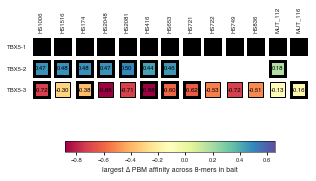

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y1h_pdi_per_tf_gene_plot("TBX5", data=y1h, ax=ax, 
                         iso_order=["TBX5-1", "TBX5-2", "TBX5-3"], bait_colors=colors, bait_annot=annot)

plt.colorbar(m, ax=ax, orientation="horizontal", shrink=0.75, label="largest ∆ PBM affinity across 8-mers in bait")
plt.savefig('../../figures/fig3/TBX5_y1h_with_pbm.pdf', bbox_inches='tight', dpi="figure")

In [44]:
np.mean([-0.72, -0.38, -0.88, -0.60, -0.62, -0.16])

-0.56

In [45]:
np.mean([-0.36, -0.88, -0.72, -0.53, -0.72, -0.51, -0.13])

-0.5499999999999999

In [46]:
def vals_per_bait_last50(row, kfit_vs, colname, alt_suffix, ascending):
    
    kmers = []
    seq = row.seq
    seq_len = row.seq_len
    for i in range(seq_len-100, seq_len-8):
        kmer = seq[i:i+8]
        kmers.append(kmer)
        
    sub = kfit_vs[kfit_vs["seq"].isin(kmers)]
    sub["abs"] = np.abs(sub[colname])
    sub = sub.sort_values(by="abs", ascending=ascending)
    largest_kmer = sub["seq"].iloc[0]
    largest_val = sub[colname].iloc[0]
    xval = sub["affinityEstimate_ref"].iloc[0]
    yval = sub["affinityEstimate_%s" % alt_suffix].iloc[0]
    
    rgb = sub["%s_rgb" % colname].iloc[0]
    return "%s_%s_%s_%s_%s" % (largest_kmer, largest_val, xval, yval, rgb)

In [47]:
tbx5_baits["tmp_iso2_l5"] = tbx5_baits.apply(vals_per_bait_last50, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso2", alt_suffix="iso2",
                                       ascending=False)
tbx5_baits["val_kmer_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso2_l5"] = tbx5_baits["tmp_iso2_l5"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso2_l5"] = tbx5_baits["rgb_iso2_l5"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [48]:
tbx5_baits["tmp_iso3_l5"] = tbx5_baits.apply(vals_per_bait_last50, axis=1, 
                                       kfit_vs=kfit_vs, colname="contrastDifference_iso3", alt_suffix="iso3",
                                       ascending=False)
tbx5_baits["val_kmer_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[0].astype(str)
tbx5_baits["val_diff_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[1].astype(float)
tbx5_baits["xval_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[2].astype(float)
tbx5_baits["yval_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[3].astype(float)
tbx5_baits["rgb_iso3_l5"] = tbx5_baits["tmp_iso3_l5"].str.split("_", expand=True)[4].astype(str)
tbx5_baits["rgb_iso3_l5"] = tbx5_baits["rgb_iso3_l5"].apply(literal_eval)

/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/PHShome/kz659/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A v

In [49]:
colors = tbx5_baits[["id_upper", "rgb_iso2_l5", "rgb_iso3_l5"]].set_index("id_upper").T
colors.index = ["TBX5-2", "TBX5-3"]
colors.loc["TBX5-1"] = [(0, 0, 0, 1)] * len(tbx5_baits)
colors = colors.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
colors

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,"(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)","(0, 0, 0, 1)"
TBX5-2,"(0.5803921568627453, 0.8313725490196079, 0.644...","(0.9991541714725106, 0.9737793156478277, 0.705...","(0.22406766628219915, 0.564552095347943, 0.728...","(0.9966935793925413, 0.8975009611687812, 0.577...","(0.5803921568627453, 0.8313725490196079, 0.644...","(0.2880430603613995, 0.6359092656670511, 0.698...","(0.24805843906189928, 0.5913110342176086, 0.71...","(0.3680123029603999, 0.7251057285659361, 0.661...","(0.3415609381007305, 0.3448673587081892, 0.651...","(0.27204921184159936, 0.6180699730872741, 0.70...","(0.43183391003460214, 0.7732410611303344, 0.64...","(0.6932718185313343, 0.8758938869665515, 0.638...","(0.7840061514802001, 0.9128027681660901, 0.620..."
TBX5-3,"(0.9665513264129182, 0.49742406766628217, 0.29...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9933102652825836, 0.7400230680507497, 0.428...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9971549404075356, 0.9118031526336025, 0.601...","(0.9997693194925029, 0.9928489042675894, 0.737...","(0.9873125720876587, 0.6473663975394078, 0.364...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9665513264129182, 0.49742406766628217, 0.29...","(0.9982314494425221, 0.9451749327181853, 0.657...","(0.9965397923875433, 0.8927335640138409, 0.569...","(0.9996155324875048, 0.988081507112649, 0.7290...","(0.9988465974625145, 0.9642445213379469, 0.689..."


In [50]:
annot = tbx5_baits[["id_upper", "val_diff_iso2_l5", "val_diff_iso3_l5"]].set_index("id_upper").T
annot.index = ["TBX5-2", "TBX5-3"]
annot.loc["TBX5-1"] = ["NA"] * len(tbx5_baits)
annot = annot.loc[["TBX5-1", "TBX5-2", "TBX5-3"]]
annot

id_upper,HS1006,HS1516,HS174,HS2048,HS2081,HS416,HS653,HS721,HS722,HS749,HS836,MUT_112,MUT_116
TBX5-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TBX5-2,0.244435,-0.14541,0.480628,-0.243657,0.243701,0.431963,0.460871,0.372767,0.63071,0.440782,0.327257,0.177546,0.114899
TBX5-3,-0.527621,-0.180591,-0.376065,-0.1804,-0.223823,-0.124494,-0.438951,-0.183357,-0.527621,-0.182687,-0.24777,-0.130375,-0.155962


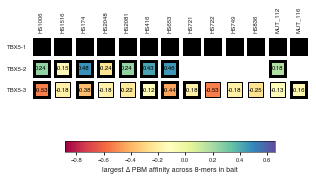

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
y1h_pdi_per_tf_gene_plot("TBX5", data=y1h, ax=ax, 
                         iso_order=["TBX5-1", "TBX5-2", "TBX5-3"], bait_colors=colors, bait_annot=annot)

plt.colorbar(m, ax=ax, orientation="horizontal", shrink=0.75, label="largest ∆ PBM affinity across 8-mers in bait")
plt.savefig('../../figures/TBX5_y1h_with_pbm_last50.pdf', bbox_inches='tight', dpi="figure")

### expression levels of TBX5

In [52]:
def developmental_tissue_expression_plot(gene_name, figsize, ylim, means, cols, fig_suffix):
    locs = [x for x in list(means.index) if x.split("|")[0] == gene_name]
    
    # include isos that aren't cloned
    locs = list(set(locs + [x for x in list(means.index) if x.split(" ")[1][:-4] == gene_name]))
    
    n_isos = len(means.loc[locs])
    palette = sns.color_palette("Set2")
    fig, axes = plt.subplots(2, 1, sharex=True)
    fig.set_size_inches(figsize)
    ### bar chart ###
    (means.loc[locs, cols]
          .T
          .plot.bar(ax=axes[0],
                    legend=False,
                    width=0.7,
                    color=list(palette)))
    ### percentages ###
    raw_means = 2 ** means.loc[locs, cols] - 1.
    (raw_means.div(raw_means.sum(axis=0))
              .T.plot.bar(ax=axes[1], 
                          stacked=True,
                          legend=False,
                          color=list(palette)))
    axes[0].set_ylabel('log2(tpm + 1)\n')
    axes[0].set_ylim(ylim)
    axes[1].set_ylabel('percent')
    axes[1].set_yticklabels(['{:.0%}'.format(t) for t in axes[1].get_yticks()])
    axes[1].legend(loc='lower left', bbox_to_anchor=(1, 0), frameon=False)
    axes[0].axhline(y=1, color='black', linewidth=0.5, linestyle="dashed")
    
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    
    plt.subplots_adjust(hspace=0.25)
    plt.savefig('../../figures/fig3/expression_' + gene_name + '_' + fig_suffix + '.pdf',
                bbox_inches='tight')

In [53]:
df_dev, metadata_dev, genes_dev = load_developmental_tissue_expression_remapped()

rename_dev_stage = {'8 week post conception,embryo': '08',
'11 week post conception,late embryo': '11',
'embryo,7 week post conception': '07',
'infant': 'infant',
'10 week post conception,late embryo': '10',
'young adult': 'young adult',
'13 week post conception,late embryo': '13',
'16 week post conception,late embryo': '16',
'4 week post conception,embryo': '04',
'neonate': 'neonate',
'19 week post conception,late embryo': '19',
'9 week post conception,late embryo': '09',
'adolescent': 'adolescent',
'5 week post conception,embryo': '05',
'embryo,6 week post conception': '06',
'12 week post conception,late embryo': '12',
'18 week post conception,late embryo': '18',
'toddler': 'toddler',
'elderly': 'elderly',
'middle adult': 'adult',
'school age child': 'child'}

metadata_dev['dev_stage'] = metadata_dev['Developmental_Stage'].map(rename_dev_stage)
means_dev = (df_dev.groupby(df_dev.columns.map(metadata_dev['organism_part'] + ' ' + metadata_dev['dev_stage']), axis=1)
           .mean())

/data/bulyk/kaia/projects/repos/tf_isoforms/cache/load_developmental_tissue_expression_remapped.pkl
reading from cache


In [54]:
df_gtex, metadata_gtex, genes_gtex = load_gtex_remapped()

exclusion_list_gtex = {'Cells - Leukemia cell line (CML)',
                       'Cells - EBV-transformed lymphocytes',
                       'Cells - Cultured fibroblasts'}

df_gtex = df_gtex.loc[:, ~df_gtex.columns.map(metadata_gtex['body_site']).isin(exclusion_list_gtex)]
metadata_gtex = metadata_gtex.loc[~metadata_gtex['body_site'].isin(exclusion_list_gtex), :]

means_gtex = df_gtex.groupby(df_gtex.columns.map(metadata_gtex['body_site']), axis=1).mean()

/data/bulyk/kaia/projects/repos/tf_isoforms/cache/load_gtex_remapped.pkl
reading from cache


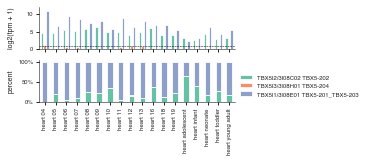

In [55]:
heart_cols = [x for x in means_dev.columns if "heart" in x]
ovary_cols = [x for x in means_dev.columns if "ovary" in x]
developmental_tissue_expression_plot("TBX5", (3.5, 1.75), (0, 12), means_dev, heart_cols, 
                                     "means_dev_heart")

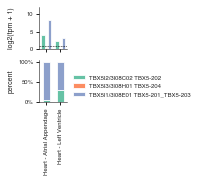

In [56]:
heart_cols = [x for x in means_gtex.columns if "Heart" in x]
developmental_tissue_expression_plot("TBX5", (0.5, 1.75), (0, 12), means_gtex, heart_cols, 
                                     "means_gtex_heart")